<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa_after/PSD_histogram_BEST_sample_08_value_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [116]:
Repetir = 40

In [117]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4

In [118]:
#!pip install mahotas

In [119]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [120]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 485 (delta 109), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (485/485), 203.62 MiB | 28.60 MiB/s, done.
Resolving deltas: 100% (226/226), done.
Checking out files: 100% (101/101), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado


In [121]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [122]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [123]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.56 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines


In [124]:
# Sample7 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

In [125]:
FILE='SugarSample08_new.zip'

img_name=[]
x_original = [] 

data_file ='csv'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        df_ImgJ =pd.read_csv(name,sep=',' )
        if( k > 0):
          df_old = df_ImgJ.copy()
        #df_ImgJ = pd.read_excel(name)
        df_ImgJ =pd.read_csv(name,sep=',' )
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [126]:
df_ImgJ.head()

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047


In [127]:
name

'sample_08_03.csv'

In [128]:
f.namelist()

['sample_08_01.csv', 'sample_08_02.csv', 'sample_08_03.csv']

In [129]:
#df_ImgJ.head()

In [130]:
#df_ImgJ.head()

In [131]:
from Segment_Filter_Reviseted_2022 import Segmenta  # got image provided segmented

In [132]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.65 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [133]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [134]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [135]:
Img_Size = 28

In [136]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [137]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 3s 161ms/step - loss: 0.5923 - accuracy: 0.7026 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 2s 142ms/step - loss: 0.3604 - accuracy: 0.8484 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 133ms/step - loss: 0.2101 - accuracy: 0.9388 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 131ms/step - loss: 0.1882 - accuracy: 0.9271 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 2s 145ms/step - loss: 0.1449 - accuracy: 0.9475 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 2s 143ms/step - loss: 0.0887 - accuracy: 0.9650 - val_loss: 0.6937 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 2s 141ms/step - loss: 0.1052 - accuracy: 0.9621 - val_loss: 0.6957 - val_accuracy: 0.5102

In [138]:
Y_test = yback(Y_test)

In [139]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        61  11
1         2  73


In [140]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        72
           1       0.87      0.97      0.92        75

    accuracy                           0.91       147
   macro avg       0.92      0.91      0.91       147
weighted avg       0.92      0.91      0.91       147



In [141]:
pred_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [142]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [143]:
Sample3 =[4,13,25]
Sample7 =[2, 5, 17]
Sample8 =[0, 3, 9]

for i in range(Repetir):
  k = 0
  for i in Sample8:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [144]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,79.725685,84.196579,88.002846,90.228432,92.452339,96.865814,103.430199,107.718323,113.247490,109.729927,96.817886,77.242599,60.214989,60.001095,65.442253,66.277962,69.426994,76.335159,73.553009,72.923302,70.595520,68.192711,64.760468,66.077728,68.012711,65.701660,81.329315,108.681061,80.312737,81.820961,84.953110,88.493896,91.109367,95.387245,101.111404,104.088982,101.000885,97.355614,85.209732,62.525673,...,99.329315,99.187157,100.616631,101.615814,101.565491,103.725327,108.066040,109.239098,109.186874,108.232529,106.473160,108.613266,60.129814,61.533859,66.607719,73.195198,71.726204,66.334137,66.500549,71.589890,79.114983,84.778503,88.517273,91.021477,93.571266,100.415298,100.986938,101.401711,101.083862,101.678940,102.947258,102.282059,101.329391,103.769165,107.083794,107.960846,106.634315,105.733727,100.830963,100.913651
1,0.815797,0.896054,0.750510,0.554780,0.476628,0.520666,0.395035,0.793244,1.415450,6.279428,21.713287,34.425575,41.973137,44.296902,38.323265,26.215342,12.358447,4.167730,1.468208,0.939223,0.217181,0.117879,0.135654,0.000000,0.000000,0.000000,0.052391,0.000000,2.704066,1.152060,0.498246,0.434695,0.176384,0.047613,0.883457,2.135287,7.751912,23.823080,40.805004,47.322495,...,35.308094,33.358746,46.040295,54.828495,39.845200,17.976776,9.052223,9.693675,14.140766,17.004810,23.556784,55.134785,91.027130,92.258713,92.914062,97.081383,100.204842,90.614082,79.609268,73.226433,78.066147,87.120583,79.280663,69.499512,49.994156,35.825287,33.670052,32.479633,33.032574,31.118378,24.662699,19.960039,17.809448,13.401283,13.252497,11.371847,13.694777,22.463463,42.258644,61.081123
2,34.707314,40.790329,45.535271,48.241337,49.567154,46.711811,46.251274,47.589512,48.154079,47.931831,43.687180,35.023445,28.802805,29.572330,36.210289,38.864189,39.819519,38.466072,39.316441,40.764709,40.014542,40.787483,40.704102,39.593189,38.928936,38.210030,38.197090,40.162308,30.470989,40.012627,43.164062,46.852695,49.032398,47.560013,46.380978,44.655815,43.591061,41.626465,36.979038,26.593447,...,90.075455,96.291069,99.358826,98.607719,94.108063,83.394333,71.005692,63.970337,61.127319,58.886333,57.173073,54.744938,45.950829,48.310123,48.277107,50.130428,54.048904,55.829563,60.854149,65.862991,63.935875,57.781738,44.653484,29.470110,37.388435,70.795815,83.764648,88.214844,91.521759,95.503738,99.214111,98.487228,98.772728,92.861023,80.514618,68.216400,62.474041,58.669785,56.574345,52.181305
3,86.032845,53.428589,27.431232,16.991667,16.492893,23.193218,34.240372,43.652977,46.010101,47.030785,48.471523,46.024117,43.379375,40.217724,36.202240,33.567200,34.419567,33.843544,33.634350,32.223507,31.705126,34.375259,35.171947,40.994122,49.607193,55.531322,60.617393,66.724045,122.324387,120.856300,112.133133,74.573082,35.543575,21.504364,23.051662,34.788357,41.627785,44.740028,47.309479,47.444176,...,0.153710,0.153710,0.000000,0.004313,0.025880,0.044113,0.259484,0.935104,2.098814,1.188707,1.667876,1.359671,0.614842,0.376826,0.891089,0.878541,0.649446,0.193216,0.000000,0.000000,0.000000,0.000000,0.156455,0.428193,0.444662,0.323890,0.000000,0.000000,0.000000,0.142731,0.164690,0.270170,0.237624,0.016665,0.168317,2.670033,9.343399,2.815018,2.139987,2.230566
4,93.795822,97.196655,103.243866,100.404800,94.029243,88.977303,88.384628,84.738205,78.516701,81.249275,93.865501,102.750511,85.653717,30.503490,43.607906,46.979462,46.614929,46.234581,48.674965,46.162197,42.973648,40.125580,38.183689,39.827305,37.720192,37.633263,38.147964,67.868431,92.095001,94.357147,103.469711,102.973793,97.316826,92.774971,91.959053,88.204720,81.438362,82.829025,89.693619,98.207832,...,53.807037,60.831131,66.434395,74.682587,67.394264,65.968658,63.417870,59.917755,59.760826,59.344002,62.358410,67.992935,95.39

In [145]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [146]:
#df_ann

In [147]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [148]:
img_graos.shape

(137, 785)

In [149]:
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [150]:
img_graos.shape

(137, 785)

In [151]:
Width=np.array(Width_new)

In [152]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

#from Get_PSDArea_Revival import PSDArea
from Get_PSDArea_Reviseted_2022_value_10 import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 907, done.
remote: Counting objects: 100% (668/668), done.
remote: Compressing objects: 100% (666/666), done.
remote: Total 907 (delta 440), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (907/907), 6.54 MiB | 5.90 MiB/s, done.
Resolving deltas: 100% (577/577), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [153]:

#!git clone https://github.com/ucfilho/marquesgabi_out_2020
#%cd marquesgabi_out_2020
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ, sep=';')
print(PSD_new.head(3))
''''''

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.10 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines
   Id   Area
0   1  0.807
1   2  1.407
2   3  1.177


''

In [154]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [155]:
Width.shape

(137,)

In [156]:
Width

array([117, 173, 139, 149, 133, 122, 101, 175, 157, 194, 172, 105, 171,
       175, 184, 133, 109, 106, 135, 193, 183, 190, 152, 174, 117, 109,
       101, 105, 111, 162, 167, 139, 200, 103, 102, 143, 199, 127, 169,
       180, 156, 170, 137, 178, 166, 175, 158, 178, 123, 190, 161, 112,
       100, 182, 181, 190, 144, 129, 164, 124, 127, 117, 150, 186, 100,
       138, 149, 117, 120, 150, 186, 158, 173, 149, 152, 101, 137, 129,
       100, 181, 137, 154, 143, 192, 104, 158, 134, 138, 107, 150, 189,
       101, 151, 112, 136, 179, 117, 131, 191, 191, 151, 104, 139, 157,
       181, 159, 134, 118, 124, 132, 162, 182, 185, 185, 139, 198, 143,
       158, 133, 151, 190, 186, 145, 113, 177, 184, 144, 125, 121, 142,
       168, 175, 143, 145, 148, 193, 176])

In [157]:
img_graos.shape

(137, 785)

In [158]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,117.0,79.725685,84.196579,88.002846,90.228432,92.452339,96.865814,103.430199,107.718323,113.247490,109.729927,96.817886,77.242599,60.214989,60.001095,65.442253,66.277962,69.426994,76.335159,73.553009,72.923302,70.595520,68.192711,64.760468,66.077728,68.012711,65.701660,81.329315,108.681061,80.312737,81.820961,84.953110,88.493896,91.109367,95.387245,101.111404,104.088982,101.000885,97.355614,85.209732,...,99.329315,99.187157,100.616631,101.615814,101.565491,103.725327,108.066040,109.239098,109.186874,108.232529,106.473160,108.613266,60.129814,61.533859,66.607719,73.195198,71.726204,66.334137,66.500549,71.589890,79.114983,84.778503,88.517273,91.021477,93.571266,100.415298,100.986938,101.401711,101.083862,101.678940,102.947258,102.282059,101.329391,103.769165,107.083794,107.960846,106.634315,105.733727,100.830963,100.913651
1,173.0,0.815797,0.896054,0.750510,0.554780,0.476628,0.520666,0.395035,0.793244,1.415450,6.279428,21.713287,34.425575,41.973137,44.296902,38.323265,26.215342,12.358447,4.167730,1.468208,0.939223,0.217181,0.117879,0.135654,0.000000,0.000000,0.000000,0.052391,0.000000,2.704066,1.152060,0.498246,0.434695,0.176384,0.047613,0.883457,2.135287,7.751912,23.823080,40.805004,...,35.308094,33.358746,46.040295,54.828495,39.845200,17.976776,9.052223,9.693675,14.140766,17.004810,23.556784,55.134785,91.027130,92.258713,92.914062,97.081383,100.204842,90.614082,79.609268,73.226433,78.066147,87.120583,79.280663,69.499512,49.994156,35.825287,33.670052,32.479633,33.032574,31.118378,24.662699,19.960039,17.809448,13.401283,13.252497,11.371847,13.694777,22.463463,42.258644,61.081123
2,139.0,34.707314,40.790329,45.535271,48.241337,49.567154,46.711811,46.251274,47.589512,48.154079,47.931831,43.687180,35.023445,28.802805,29.572330,36.210289,38.864189,39.819519,38.466072,39.316441,40.764709,40.014542,40.787483,40.704102,39.593189,38.928936,38.210030,38.197090,40.162308,30.470989,40.012627,43.164062,46.852695,49.032398,47.560013,46.380978,44.655815,43.591061,41.626465,36.979038,...,90.075455,96.291069,99.358826,98.607719,94.108063,83.394333,71.005692,63.970337,61.127319,58.886333,57.173073,54.744938,45.950829,48.310123,48.277107,50.130428,54.048904,55.829563,60.854149,65.862991,63.935875,57.781738,44.653484,29.470110,37.388435,70.795815,83.764648,88.214844,91.521759,95.503738,99.214111,98.487228,98.772728,92.861023,80.514618,68.216400,62.474041,58.669785,56.574345,52.181305
4,149.0,93.795822,97.196655,103.243866,100.404800,94.029243,88.977303,88.384628,84.738205,78.516701,81.249275,93.865501,102.750511,85.653717,30.503490,43.607906,46.979462,46.614929,46.234581,48.674965,46.162197,42.973648,40.125580,38.183689,39.827305,37.720192,37.633263,38.147964,67.868431,92.095001,94.357147,103.469711,102.973793,97.316826,92.774971,91.959053,88.204720,81.438362,82.829025,89.693619,...,53.807037,60.831131,66.434395,74.682587,67.394264,65.968658,63.417870,59.917755,59.760826,59.344002,62.358410,67.992935,95.397598,99.878571,100.647270,97.353821,90.786453,64.024864,34.064819,43.282784,46.539345,49.769650,52.555832,55.364536,53.983971,51.112381,45.612587,46.489933,54.113602,60.564034,64.547096,68.530792,60.906715,59.906860,56.427372,56.061890,58.743305,61.722359,70.941353,75.830688
5,133.0,2.922438,7.470914,11.675900,17.886427,23.085875,21.667589,22.897505,29.423824,35.401661,37.734074,38.933517,39.675903,46.795013,56.080338,62.695290,70.529083,70.160667,68.764542,70.227150,68.919662,69.412743,72.454292,82.925209,95.074783,105.833786,112.083107,108.545708,89.326866,2.246537,6.108033,11.027700,11.686980,12.720222,15.213297,21.540167,29.761776,35.263157,36.831024,37.720222,...,67.412743,50.819942,25.711910,19.036013,13.451523,8.299170,6.016621,4.886426,8.085873,16.595568,21.736839

In [159]:
PSD_new['Area']

0     0.807
1     1.407
2     1.177
3     1.289
4     1.743
      ...  
94    2.097
95    1.871
96    1.315
97    1.034
98    2.095
Name: Area, Length: 99, dtype: float64

In [160]:
 df_ImgJ

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047
...,...,...
74,37,0.901
75,38,1.165
76,39,1.264
77,40,1.021


In [161]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [162]:
len(Diameter_All)

137

In [163]:
#

#PSD_new['Area'].shape

In [164]:
#PSD_new.iloc[:,0]

In [165]:
'''
Area2 = PSD_new['Area'].values
#k = 0
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5)
  #k = k + 1 
'''

"\nArea2 = PSD_new['Area'].values\n#k = 0\nfor A in Area2:\n  Diam1.append((4*A/np.pi)**0.5)\n  #k = k + 1 \n"

In [166]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [167]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136
0,1.145736,1.535591,1.395728,1.312999,1.154592,1.611253,1.292967,1.107307,1.694073,1.202134,1.199484,1.140724,1.484151,1.600947,1.619922,1.570435,1.303754,1.395728,1.476410,1.370876,1.354525,1.255496,1.378748,1.374123,1.410248,1.915588,1.039702,1.383358,1.487151,0.962105,1.454253,1.417003,1.194697,1.668705,1.071069,1.217918,1.268611,1.140166,1.385657,1.620315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.762299,1.066043,0.899384,1.306760,1.054785,0.805740,0.833809,1.252354,1.114964,1.509708,1.244846,0.707259,1.397508,1.173695,1.242044,1.054785,0.784474,0.736619,0.831883,1.417452,1.052899,1.557307,1.136307,1.472937,0.854619,0.683618,0.913392,0.736988,0.934512,1.191924,1.358836,1.009742,1.561397,0.752356,0.685576,1.059673,1.563485,0.908851,1.193213,1.253382,...,0.994554,1.417874,1.493514,1.027961,0.741421,0.950236,1.146796,1.362499,1.255114,1.075796,0.928553,0.966518,0.979892,1.100526,1.483063,1.34142,1.318873,1.167025,1.406132,1.01554,1.319197,0.884251,1.120937,1.402955,1.456731,1.119283,0.916744,1.292884,1.396931,0.961593,1.186893,0.93707,1.117411,1.408556,1.44884,1.130576,1.169371,0.988304,1.588759,1.681939


In [168]:
len(Diameter_All)

137

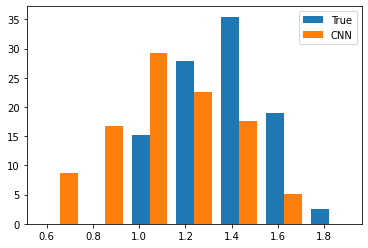

In [169]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [170]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.3621288326512706 desvio= 0.20110347688312627 pontos= 79


In [171]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.124173970445739 desvio= 0.2470389970434523 pontos= 137
